<div class="alert alert-block alert-success">
    <b><center>CNN Basic Examples</center></b>
    <b><center>Basic CNN</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)

2021-07-20 04:30:59.989827: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, preprocessing, utils

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.4.1'

# Prepare Data
SMS Spam Dataset(two columns) : v1 contains the label (ham or spam) and v2 contains the raw text.

In [5]:
# Naver Sentiment Movie Corpus v1.0 다운로드
data_path = utils.get_file(
    'spam.csv',
    'https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv'
)

In [6]:
df_ori = pd.read_csv(data_path, encoding="latin1")

In [7]:
df_ori.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df_data = df_ori.copy()
del df_data["Unnamed: 2"]
del df_data["Unnamed: 3"]
del df_data["Unnamed: 4"]

In [9]:
df_data.v1 = df_ori.v1.replace(["ham", "spam"], [0, 1])
df_data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
len(df_data), len(df_data.v1.unique()), len(df_data.v2.unique())

(5572, 2, 5169)

In [11]:
df_data.drop_duplicates(inplace=True)

In [12]:
len(df_data), len(df_data.v1.unique()), len(df_data.v2.unique())

(5169, 2, 5169)

In [13]:
train_ori = df_data.v2.values
label_ori = df_data.v1.values
train_ori.shape, label_ori.shape

((5169,), (5169,))

# Preprocessing Data

In [14]:
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train_ori)

In [15]:
SIZE_VOCAB = len(tokenizer.word_index) + 1

In [16]:
train_num = tokenizer.texts_to_sequences(train_ori)

In [17]:
print(train_num[:2])

[[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137], [49, 306, 1364, 435, 6, 1767]]


In [18]:
LEN_SENTENCE_MAX = max([len(item) for item in train_num])
LEN_SENTENCE_MAX

189

In [19]:
train_num = preprocessing.sequence.pad_sequences(train_num, LEN_SENTENCE_MAX, padding="post")
train_num.shape

(5169, 189)

In [20]:
print(train_num[:1])

[[  47  433 4013  780  705  662   64    8 1202   94  121  434 1203  142 2712 1204   68   57 4014  137    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [21]:
train_data, test_data, train_label, test_label = train_test_split(train_num, label_ori, test_size= 0.2, random_state=88)
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((4135, 189), (4135,), (1034, 189), (1034,))

# Create Model

In [22]:
model = models.Sequential([
    layers.Input((172,)),
    layers.Embedding(SIZE_VOCAB, 32),
    layers.SimpleRNN(32),
    layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 172, 32)           285472    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 287,585
Trainable params: 287,585
Non-trainable params: 0
_________________________________________________________________


2021-07-20 04:31:02.337834: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-07-20 04:31:02.338602: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-07-20 04:31:02.364417: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2021-07-20 04:31:02.364441: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jupyterlab
2021-07-20 04:31:02.364446: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jupyterlab
2021-07-20 04:31:02.364565: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.42.1
2021-07-20 04:31:02.364583: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 465.31.0
2021-07-20 04:3

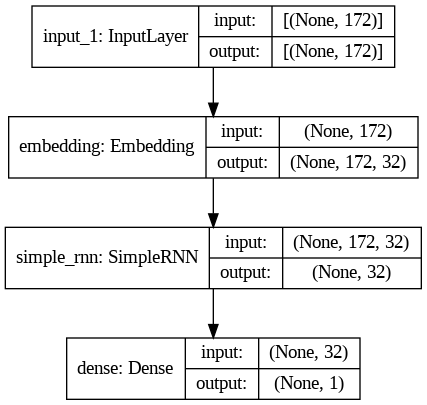

In [23]:
utils.plot_model(model, "intermediate/model.png", True)

# Compile & Learning

In [24]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [25]:
history = model.fit(
    train_data,
    train_label,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

2021-07-20 04:31:02.564260: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-20 04:31:02.564601: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/10
52/52 [==============================] - 2s 34ms/step - loss: 0.5082 - accuracy: 0.7647 - val_loss: 0.3673 - val_accuracy: 0.8803
Epoch 2/10
52/52 [==============================] - 1s 24ms/step - loss: 0.3610 - accuracy: 0.8831 - val_loss: 0.3673 - val_accuracy: 0.8803
Epoch 3/10
52/52 [==============================] - 1s 26ms/step - loss: 0.3776 - accuracy: 0.8747 - val_loss: 0.3663 - val_accuracy: 0.8803
Epoch 4/10
52/52 [==============================] - 1s 26ms/step - loss: 0.3675 - accuracy: 0.8798 - val_loss: 0.3664 - val_accuracy: 0.8803
Epoch 5/10
52/52 [==============================] - 1s 24ms/step - loss: 0.3655 - accuracy: 0.8808 - val_loss: 0.3666 - val_accuracy: 0.8803
Epoch 6/10
52/52 [==============================] - 1s 24ms/step - loss: 0.3676 - accuracy: 0.8803 - val_loss: 0.3664 - val_accuracy: 0.8803
Epoch 7/10
52/52 [==============================] - 1s 25ms/step - loss: 0.3720 - accuracy: 0.8779 - val_loss: 0.3683 - val_accuracy: 0.8803
Epoch 8/10
52

<AxesSubplot:>

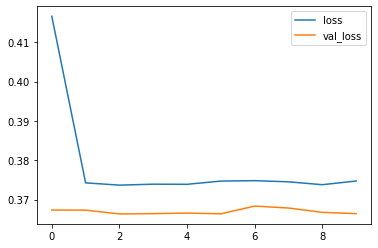

In [26]:
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()

<AxesSubplot:>

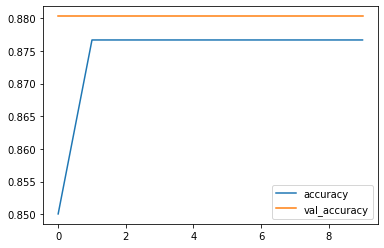

In [27]:
history_df[["accuracy", "val_accuracy"]].plot()

# Evaluate

In [28]:
test_scores = model.evaluate(test_data, test_label, verbose=2)

33/33 - 0s - loss: 0.4085 - accuracy: 0.8588


# Save And Serialize

In [29]:
model.save("intermediate/spam.h5")

# Prediction

In [30]:
# Recreate the exact same model purely from the file:
model_loaded = models.load_model("intermediate/spam.h5")

In [31]:
test_data[:1]

array([[1342, 1820,   63, 3081,   34, 6980,   18,   39,    9,   40,  146,   23,    9,   14,  185,  173,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0

In [32]:
model_loaded.predict(test_data[:20]).tolist()

[[0.1238257884979248],
 [0.12382575869560242],
 [0.1238257884979248],
 [0.12382575869560242],
 [0.1238257884979248],
 [0.12382575869560242],
 [0.12382575869560242],
 [0.12382575869560242],
 [0.1238257884979248],
 [0.12382575869560242],
 [0.12382575869560242],
 [0.12382575869560242],
 [0.1238257884979248],
 [0.1238257884979248],
 [0.12382575869560242],
 [0.1238257884979248],
 [0.1238257884979248],
 [0.12382575869560242],
 [0.12382575869560242],
 [0.12382575869560242]]

In [33]:
test_label[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])